In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
df = pd.read_csv('/Users/prateeklodha/Desktop/data analysis/data_jobs.csv')
df['job_posted_date']=pd.to_datetime(df.job_posted_date)


import ast

def clean_list(skill_list):
    if pd.notna(skill_list):
        return ast.literal_eval(skill_list)
    

df['job_skills'] = df['job_skills'].apply(clean_list)

<Axes: xlabel='Month', ylabel='Count'>

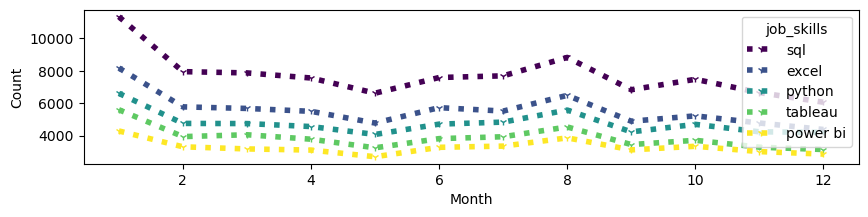

In [16]:
df_DA = df[df['job_title_short']=='Data Analyst'].copy()

df_DA['job_posted_month_no']=df_DA['job_posted_date'].dt.month

df_DA
df_DA_exploded=df_DA.explode('job_skills').copy()

df_DA_pivot = df_DA_exploded.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

top_skills = df_DA_exploded['job_skills'].value_counts().head(5).index.tolist()

df_DA_pivot[top_skills].plot(kind='line', ylabel='Count', xlabel='Month'
    , linewidth=4, linestyle=':' , colormap="viridis" , marker="1", markersize=5 , figsize=(10,2)       )            
     